In [1]:
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt

### 1.收益最高的三类电影

In [2]:
movie=pd.read_csv('imdb_movies.csv')

In [3]:
movie.head()#验证读取成功

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
res=[]
#遍历每个电影类别
for type in list(set(','.join(movie['Genre']).split(','))):
    tmp=movie[movie['Genre'].str.contains(type)]
    res.append([type,np.sum(tmp['Revenue (Millions)'])])

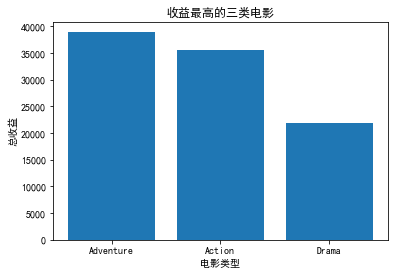

In [5]:
#根据值进行排序
res.sort(key=lambda x: (x[1], x[0]),reverse=True)

words=[r[0] for r in res]
counts=[r[1] for r in res]

#防止中文乱码
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#画柱状图
plt.bar(words[:3],counts[:3])
plt.xlabel('电影类型')
plt.ylabel('总收益')
plt.title('收益最高的三类电影')
plt.show()

### 2.受教育程度和收入关系

In [6]:
dat=pd.read_csv('income.csv')

In [7]:
dat.head()#验证读取成功

,age,work,fnlwgt,edu,edu_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
dat['income']=dat['income'].map({' <=50K':0,' >50K':1})

In [9]:
res=[]
#遍历每个学历
for edutype in dat['edu_num'].unique():
    tmp=dat[dat['edu_num']==edutype]
    res.append([edutype,np.mean(tmp['income'])])

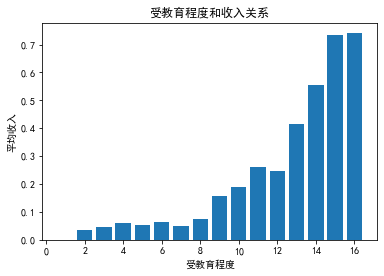

In [10]:
#防止中文乱码
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#画柱状图
plt.bar([i[0] for i in res],[i[1] for i in res])
plt.xlabel('受教育程度')
plt.ylabel('平均收入')
plt.title('受教育程度和收入关系')
plt.show()

根据上图发现，受教育程度越高，收入越高。

### 3.全球疫情趋势变化

In [11]:
confirmed=pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths=pd.read_csv('time_series_covid19_deaths_global.csv')
recovered=pd.read_csv('time_series_covid19_recovered_global.csv')

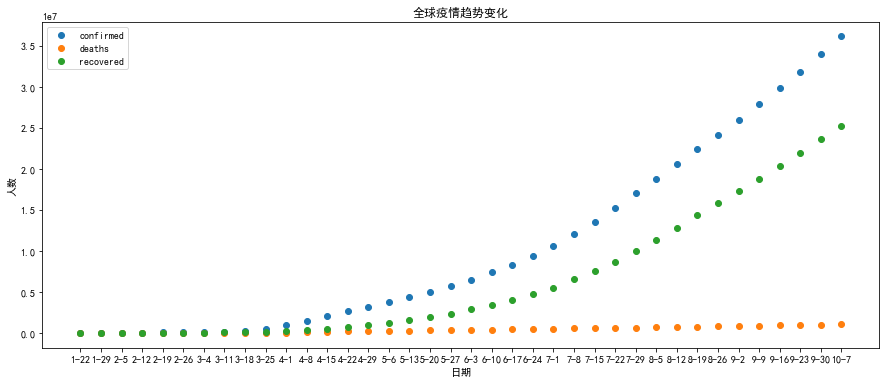

In [12]:
#每天的总人数
plt.figure(figsize=(15,6)) 
res=[]
for col in confirmed.columns[4:]:
    res.append([col,np.sum(confirmed[col])])
plt.scatter(['-'.join(res[i][0].split('/')[:2]) for i in range(len(res)) if i%7==0],[res[i][1] for i in range(len(res))if i%7==0],label='confirmed')

res=[]
for col in deaths.columns[4:]:
    res.append([col,np.sum(deaths[col])])
plt.scatter(['-'.join(res[i][0].split('/')[:2]) for i in range(len(res)) if i%7==0],[res[i][1] for i in range(len(res))if i%7==0],label='deaths')


res=[]
for col in recovered.columns[4:]:
    res.append([col,np.sum(recovered[col])])
plt.scatter(['-'.join(res[i][0].split('/')[:2]) for i in range(len(res)) if i%7==0],[res[i][1] for i in range(len(res))if i%7==0],label='recovered')


plt.xlabel('日期')
plt.ylabel('人数')
plt.title('全球疫情趋势变化')
plt.legend()
plt.show()


### 4.全球各国确诊人数前30名

In [13]:
def rosetype_pie(country,confirmed,size,colors):
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文显示

    num= len(size) # 柱子的数量
    width = 2 * np.pi / num # 每个柱子的宽度
    rad = np.cumsum([width] * num)  # 每个柱子的角度
    
    plt.figure(figsize=(8, 8),dpi=500,)  # 创建画布
    ax = plt.subplot(projection='polar')
    ax.set_ylim(-1, np.ceil(max(size) + 1))  # 中间空白,-1为空白半径大小，可自行调整
    ax.set_theta_zero_location('N',-5.0)  # 设置极坐标的起点方向 W,N,E,S, -5.0为偏离数值，可自行调整
    ax.set_theta_direction(1) # 1为逆时针，-1为顺时针
    ax.grid(False)  # 不显示极轴
    ax.spines['polar'].set_visible(False)  # 不显示极坐标最外的圆形
    ax.set_yticks([])  # 不显示坐标间隔
    ax.set_thetagrids([])  # 不显示极轴坐标

    ax.bar(rad, size, width=width, color=colors, alpha=1) # 画图
    ax.bar(rad, 1, width=width, color='white', alpha=0.15)  # 中间添加白色色彩使图案变浅
    ax.bar(rad, 3, width=width, color='white', alpha=0.1)  # 中间添加白色色彩使图案变浅
    ax.bar(rad, 5, width=width, color='white', alpha=0.05)  # 中间添加白色色彩使图案变浅
    ax.bar(rad, 7, width=width, color='white', alpha=0.03)  # 中间添加白色色彩使图案变浅

    # 设置text
    for i in np.arange(num):
        if i < 8:
            ax.text(rad[i],  # 角度
                    size[i]-0.2,  # 长度
                    country[i]+'\n'+str(confirmed[i])+'例',  # 文本
                    rotation=rad[i] * 180 / np.pi -5,  # 文字角度
                    rotation_mode='anchor',
                    # alpha=0.8,#透明度
                    fontstyle='normal',# 设置字体类型，可选参数[ ‘normal’ | ‘italic’ | ‘oblique’ ]，italic斜体，oblique倾斜
                    fontweight='black', # 设置字体粗细，可选参数 [‘light’, ‘normal’, ‘medium’, ‘semibold’, ‘bold’, ‘heavy’, ‘black’]
                    color='white', # 设置字体颜色
                    size=size[i]/2.2, # 设置字体大小
                    ha="center", # 'left','right','center'
                    va="top", # 'top', 'bottom', 'center', 'baseline', 'center_baseline'
                    )
        elif i < 15:
            ax.text(rad[i]+0.02,
                    size[i]-0.7,
                    country[i] + '\n' + str(confirmed[i]) + '例',
                    fontstyle='normal',
                    fontweight='black',
                    color='white',
                    size=size[i] / 1.6,
                    ha="center",
                    )
        else:
            ax.text(rad[i],
                    size[i]+0.1,
                    str(confirmed[i]) + '例 ' + country[i],
                    rotation=rad[i] * 180 / np.pi + 85,
                    rotation_mode='anchor',
                    fontstyle='normal',
                    fontweight='black',
                    color='black',
                    size=4,
                    ha="left",
                    va="bottom",
                    )

    plt.show()

In [14]:
colors = [(0.68359375, 0.02734375, 0.3203125),
                    (0.78125, 0.05078125, 0.2578125),
                    (0.875, 0.0390625, 0.1796875),
                    (0.81640625, 0.06640625, 0.0625),
                    (0.8515625, 0.1484375, 0.08203125),
                    (0.90625, 0.203125, 0.13671875),
                    (0.89453125, 0.2890625, 0.0703125),
                    (0.84375, 0.2421875, 0.03125),
                    (0.9140625, 0.26953125, 0.05078125),
                    (0.85546875, 0.31640625, 0.125),
                    (0.85546875, 0.3671875, 0.1171875),
                    (0.94921875, 0.48046875, 0.28125),
                    (0.9375, 0.51171875, 0.1484375),
                    (0.93359375, 0.59765625, 0.0625),
                    (0.93359375, 0.62890625, 0.14453125),
                    (0.86328125, 0.5859375, 0.15234375),
                    (0.86328125, 0.71875, 0.16015625),
                    (0.86328125, 0.8203125, 0.16015625),
                    (0.76171875, 0.8671875, 0.16015625),
                    (0.53125, 0.85546875, 0.15625),
                    (0.4765625, 0.94140625, 0.0703125),
                    (0.21484375, 0.91015625, 0.0625),
                    (0.15234375, 0.88671875, 0.08203125),
                    (0.11328125, 0.87890625, 0.19921875),
                    (0.11328125, 0.8125, 0.1796875),
                    (0.1875, 0.76953125, 0.2109375),
                    (0.2109375, 0.78125, 0.38671875),
                    (0.1484375, 0.76953125, 0.30859375),
                    (0.22265625, 0.73046875, 0.35546875),
                    (0.2890625, 0.6875, 0.4765625)] # 转化为小数的rgb色列表

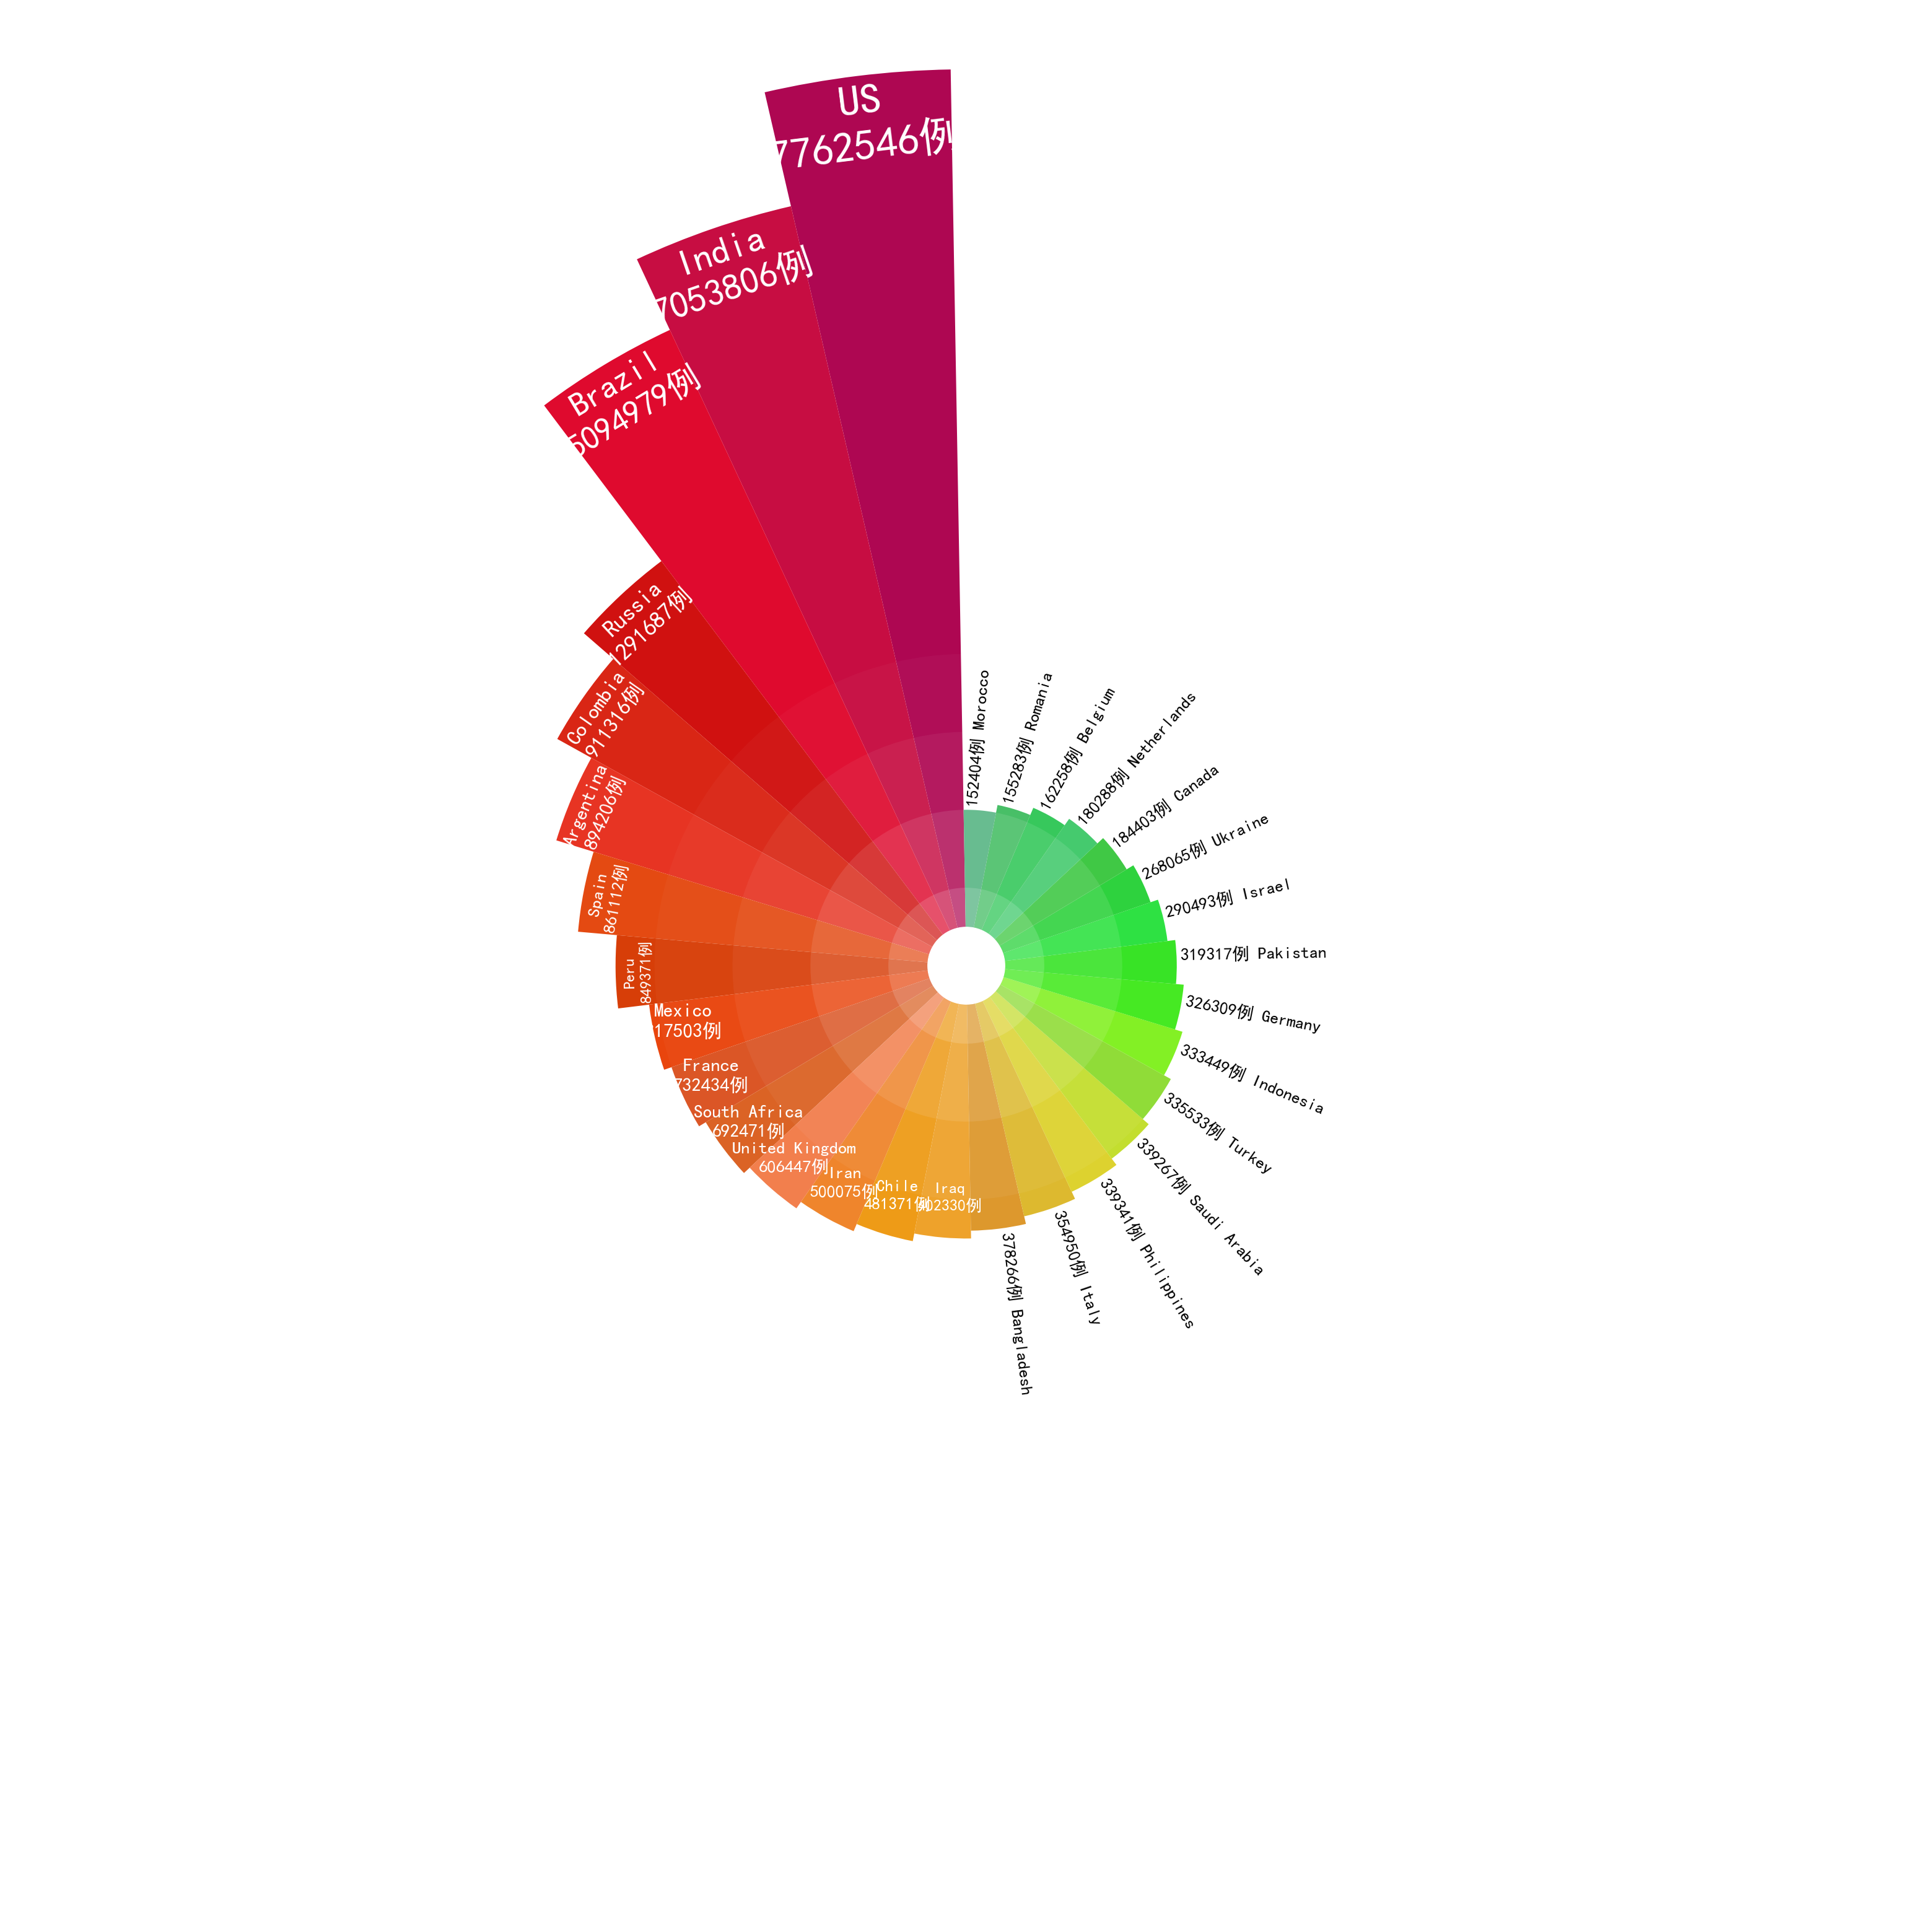

In [15]:
confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv') # 利用pandas读取数据
confirmed=confirmed.groupby('Country/Region')['10/11/20'].sum().reset_index()
confirmed.sort_values(by='10/11/20',ascending=False,inplace=True)
file = confirmed.head(30)#选择10.11日确诊数前三十的国家

country = file['Country/Region'].tolist()
confirmed = file['10/11/20'].tolist()
size = [22 , 19, 17, 12, 11, 10, 9, 8, 7.2, 7.0, 6.8, 6.6, 6.4, 6.2, 6.0, 5.8, 5.6, 5.4, 5.2, 5.0, 4.8, 4.6, 4.4, 4.2, 4.0, 3.8, 3.6, 3.4, 3.2, 3.0] # 自定义一个柱长度列

rosetype_pie(country, confirmed, size, colors)